In [1]:
import matplotlib.pyplot as plt
import numpy as np
from SecondaryValue import SecondaryValue
from importlib import reload
import utility
reload(utility)
from utility import *
from scipy.optimize import curve_fit
import scipy.constants as const
%matplotlib inline


In [2]:
e_cs_1 = (32.194*3.64 + 31.817*1.99)/(3.64+1.99)  # keV
e_ba_1 = (30.625*33.9 + 30.973*62.2)/(62.2 + 33.9)  # keV
e_ba_2 = (79.6142*2.65 + 80.9979*32.9)/(2.65 + 32.9)  # keV
e_ba_3 = 53.1622  # keV
e_am_1 = 26.3446  # keV
e_am_2 = 59.5409  # keV

e_eu_1 = (5.65*14 + 5.06*0.174)/(14+.174)
energies = [e_cs_1, e_ba_1, e_ba_2, e_ba_3, e_am_1, e_am_2, e_eu_1]


In [3]:
cal_cs = load_spectrum('../messung/cal/cs137.dat')
cal_ba = load_spectrum('../messung/cal/ba133.dat')
cal_am = load_spectrum('../messung/cal/am241.dat')
cal_eu = load_spectrum('../messung/cal/eu152.dat')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2352c95640>)

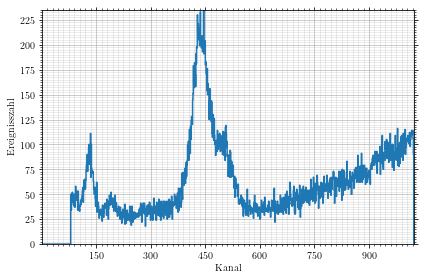

In [4]:
plot_spec(cal_eu)

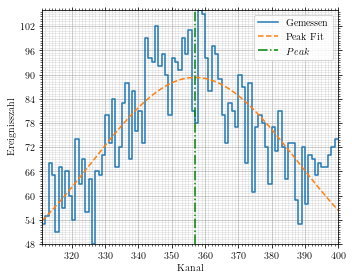

In [5]:
p_cs_1, d_p_cs_1 = calibrate_peak(cal_cs, 310, 400, save=('cs', 'calibrate'))

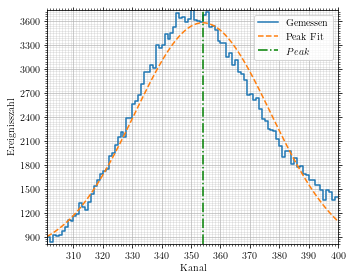

In [6]:
p_ba_1, d_p_ba_1 = calibrate_peak(cal_ba, 300, 400, save=('ba_1', 'calibrate'))

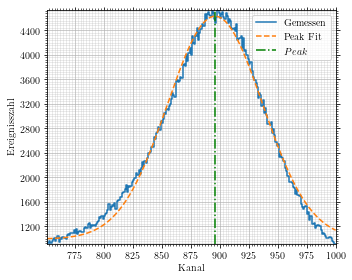

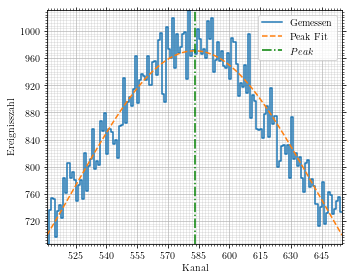

In [7]:
p_ba_2, d_p_ba_2 = calibrate_peak(cal_ba, 750, 1000, save=('ba_2', 'calibrate'))
p_ba_3, d_p_ba_3 = calibrate_peak(cal_ba, 510, 655, save=('ba_3', 'calibrate'))

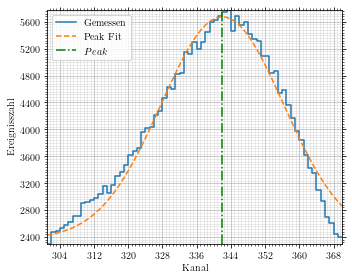

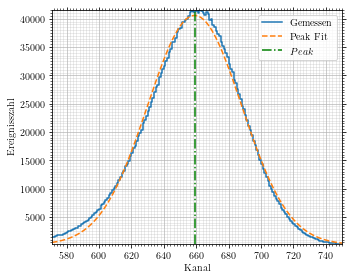

In [8]:
p_am_1, d_p_am_1 = calibrate_peak(cal_am, 300, 370, save=('am_1', 'calibrate'))
p_am_2, d_p_am_2 = calibrate_peak(cal_am, 570, 750, save=('am_2', 'calibrate'))

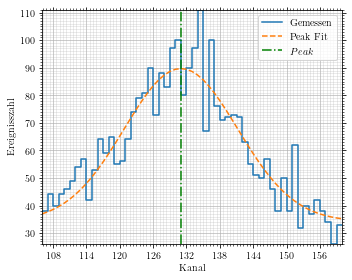

In [9]:
p_eu_1, d_p_eu_1 = calibrate_peak(cal_eu, 105, 160, save=('eu_1', 'calibrate'))

In [10]:
peaks, d_peaks = [p_ba_1, p_ba_2, p_am_1, p_am_2, p_eu_1], [d_p_ba_1, d_p_ba_2, d_p_am_1, d_p_am_2, d_p_eu_1]

In [11]:
peaks, d_peaks = [p_cs_1, p_ba_1, p_ba_2, p_ba_3, p_am_1, p_am_2, p_eu_1], \
    [d_p_cs_1, d_p_ba_1, d_p_ba_2, d_p_ba_3, d_p_am_1, d_p_am_2, d_p_eu_1]

In [12]:
d_peaks

[10.795334261708373,
 0.9345051706661492,
 0.591736502922389,
 9.396048698327247,
 0.7153353271878469,
 0.41324372536218723,
 1.3554772567497477]

In [13]:
def Ef(x, a, b):
    return (x - a)/b
    

In [14]:
pe, d_pe = curve_fit(Ef, energies, peaks, sigma=d_peaks)
d_pe =  np.sqrt(np.diag(d_pe))

In [15]:
pe, d_pe

(array([-5.76392512,  0.09795596]), array([1.52291478, 0.00234475]))

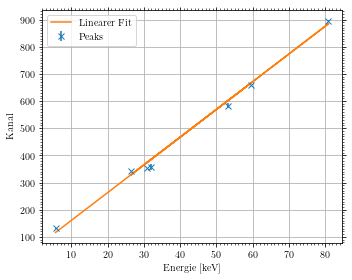

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
pinmp_ticks(ax.xaxis, 10)
pinmp_ticks(ax.yaxis, 10)
ax.grid(which='major')
ax.tick_params(right=True, top=True, which='both')
ax.set_xlabel('Energie [keV]')
ax.set_ylabel('Kanal')
ax.errorbar(energies, peaks, linestyle='None', marker='x', yerr=d_peaks, label='Peaks')
ax.plot(energies, Ef(np.array(energies), *pe), label='Linearer Fit')
ax.legend()
save_fig(fig, 'energy_fit', 'calibrate')


In [17]:
EE = SecondaryValue('b*K+a', defaults=dict(a=(pe[0], d_pe[0]), b=(pe[1], d_pe[1])))

In [18]:
EE(K=peaks[-2])

(58.789051689343374, 2.169533171818233)

In [19]:
e_am_2

59.5409

In [20]:
am_2 = load_spectrum('../messung/2/2_90.dat', absolute=True)
am_2_0 = load_spectrum('../messung/2/3_90_0.dat', absolute=True)

(<Figure size 360x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f23517320d0>)

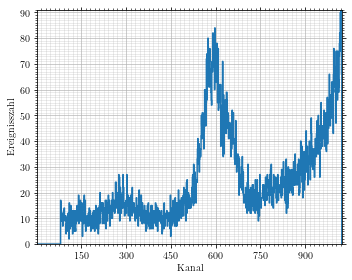

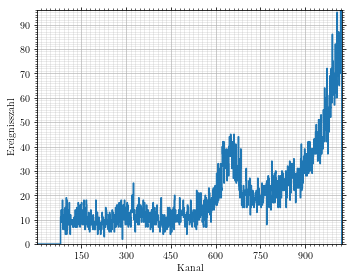

In [21]:
plot_spec(am_2, save=('am_90', 'hists'))
plot_spec(am_2_0, save=('am_90_0', 'hists'))


In [22]:
t = (1200 + 1165.2)/2
N = am_2[530:780].sum()/t
N0 = am_2_0[530:780].sum()/t
t, N, N0, np.sqrt(am_2[530:780].sum())/t, np.sqrt(am_2_0[530:780].sum())/t

(1182.6,
 7.9621173685100635,
 4.683747674615255,
 0.08205316739866873,
 0.06293290913695121)

In [23]:
tt = t_opt(N_g=N, N_0=N0, prec=([.05, .03],))
d_tt = d_t_opt(N_g=N, N_0=N0, prec=([.05, .03],), t=t)

In [24]:
tt/60


array([ 7.84406946, 21.78908184])

In [25]:
p_am_2

659.0

In [26]:
N0

4.683747674615255

In [27]:
d_tt/60

array([1.5808687 , 4.39130194])

In [28]:
am_2_0[530:780].sum()

5539.0

# E(mu)

In [29]:
deg_angles = np.array([30, 45, 60, 75, 90, 105, 120])
angles = np.array([30, 45, 60, 75, 90, 105, 120])*np.pi/180
e_ref, deps = E(E_in=e_am_2, theta=(angles,), retdeps=True)
mus = deps['mu'][0]

In [30]:
deps

{'mu': ((array([ 8.66025404e-01,  7.07106781e-01,  5.00000000e-01,  2.58819045e-01,
           6.12323400e-17, -2.58819045e-01, -5.00000000e-01]),), {}),
 'kappa': ((0.116518634725179,), {})}

In [31]:
e_am_1*1e3

26344.6

In [32]:
e_ref

array([58.62572101, 57.57597488, 56.26305294, 54.80763619, 53.32727833,
       51.92478644, 50.68268424])

In [33]:
a_30 = load_spectrum('../messung/angles/4_30.SPC.dat', absolute=True)
a_30_0 = load_spectrum('../messung/angles/4_30_null.SPC.dat', absolute=True)

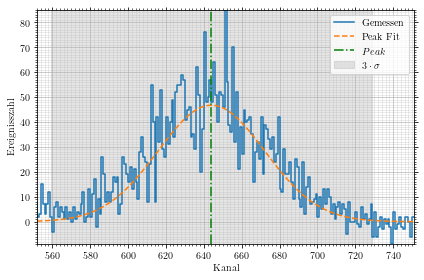

In [34]:
tp = find_peak(a_30, a_30_0, [450, 800], 100)

In [35]:
np.array(area(s=tp[2:4], A=tp[4:6], O=tp[6]))/(7*60)

array([7.86240591, 0.45120056])

In [36]:
area(s=1, O=1, A=1)

3.5066282746310007

In [37]:
angle_specs = np.array([[load_spectrum(f'../messung/angles/4_{i}.SPC.dat', absolute=True) for i in deg_angles], [load_spectrum(f'../messung/angles/4_{i}_null.SPC.dat', absolute=True) for i in deg_angles]])

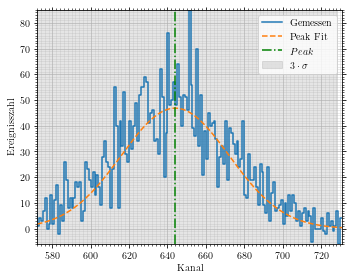

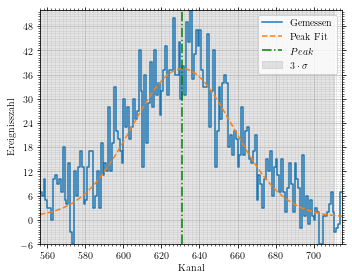

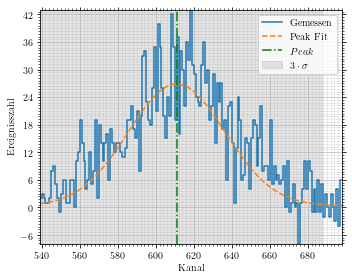

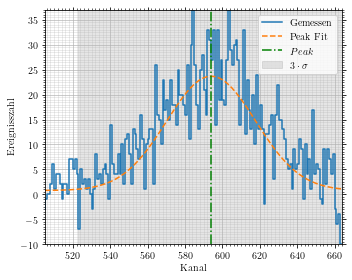

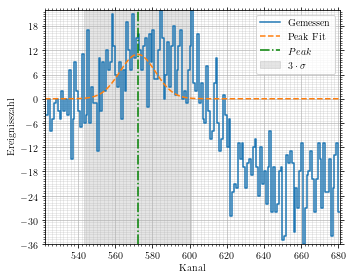

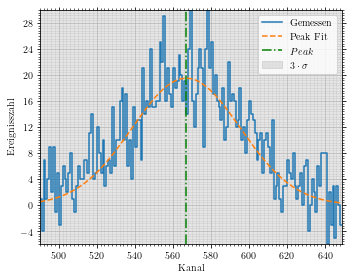

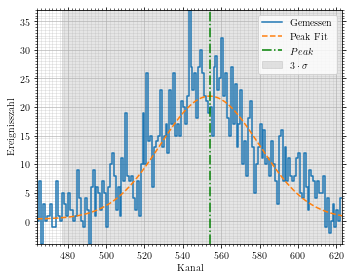

In [38]:
peaks = np.array([np.array(find_peak(angle_specs[0][i], angle_specs[1][i], [450, 800], 80, save=(str(deg_angles[i]), 'winkelmessung'))) for i in range(angle_specs.shape[1])])

In [39]:
angle_energies = EE(K=(peaks[:,0],peaks[:,1]))

/home/hiro/Documents/Projects/UNI/Prakt/FP/CS/auswertung/utility.py:73: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(mu)*180/np.pi


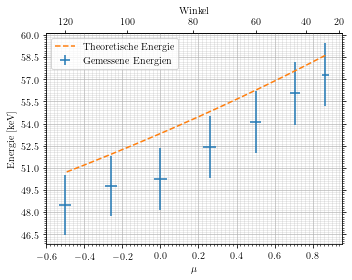

In [40]:
fig, ax = set_up_angle_plot()
mus, d_mus = mu(theta=(angles, 2*np.pi/180))
ax.set_ylabel('Energie [keV]')
smooth = np.linspace(deg_angles.min(), deg_angles.max(), 1000)*np.pi/180
ax.errorbar(mus, angle_energies[0], xerr=d_mus, yerr=angle_energies[1], label='Gemessene Energien', linestyle='None')
ax.plot(np.cos(smooth),E(E_in=e_am_2, theta=[smooth,1])[0], label='Theoretische Energie', linestyle='--')
ax.legend()
save_fig(fig, 'energycurve', 'winkelmessung')


In [41]:
angle_energies

(array([57.31971231, 56.04628484, 54.08716567, 52.42191437, 50.26688328,
        49.77710348, 48.50367602]),
 array([2.1590114 , 2.13651426, 2.10887713, 2.08271725, 2.09660882,
        2.04375845, 2.01741217]))

In [42]:
mus

array([ 8.66025404e-01,  7.07106781e-01,  5.00000000e-01,  2.58819045e-01,
        6.12323400e-17, -2.58819045e-01, -5.00000000e-01])

In [43]:
peaks

array([[6.44000000e+02, 2.54011700e+00, 2.81246280e+01, 1.47510862e+00,
        4.68152263e+01, 1.99482457e+00, 1.33980801e-22, 9.49925813e-01],
       [6.31000000e+02, 2.42444058e+00, 2.66667305e+01, 1.40375334e+00,
        3.67646129e+01, 1.58425454e+00, 6.61944410e-01, 7.82612862e-01],
       [6.11000000e+02, 2.80759756e+00, 2.54482900e+01, 1.58327314e+00,
        2.65410176e+01, 1.43867191e+00, 3.10564782e-01, 6.24595255e-01],
       [5.94000000e+02, 2.86221733e+00, 2.38276668e+01, 1.53539167e+00,
        2.29337906e+01, 1.41730342e+00, 7.49989323e-01, 5.18821980e-01],
       [5.72000000e+02, 5.37964773e+00, 9.59226724e+00, 2.75939453e+00,
        1.10000000e+01, 3.18132227e+00, 7.38647984e-29, 8.30821585e-01],
       [5.67000000e+02, 3.06576525e+00, 2.85090756e+01, 1.86022744e+00,
        1.94975573e+01, 9.45929221e-01, 1.15734964e-17, 6.16575420e-01],
       [5.54000000e+02, 2.56863763e+00, 2.56729847e+01, 1.41929622e+00,
        2.15262806e+01, 1.07086439e+00, 3.76781622e-01, 4.

In [44]:
rates = np.array([find_rates(angle_specs[0][i], angle_specs[1][i], 7*60, peaks[i][0],
                             peaks[i][2]) for i in range(angle_specs.shape[1])])

In [45]:
rates

array([[9.08571429, 0.28300301],
       [6.94761905, 0.20292644],
       [5.10952381, 0.16485409],
       [4.2       , 0.14979199],
       [1.15      , 0.11346431],
       [3.76904762, 0.13198725],
       [4.03571429, 0.12977829]])

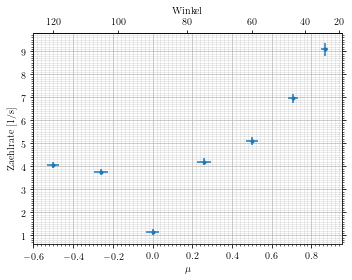

In [46]:
fig, ax = set_up_angle_plot()
ax.set_ylabel('Zaehlrate [1/s]')
ax.errorbar(mus, rates.T[0], xerr=d_mus, yerr=rates.T[1], linestyle='None', marker='.')
save_fig(fig, 'countrates', 'crossec')


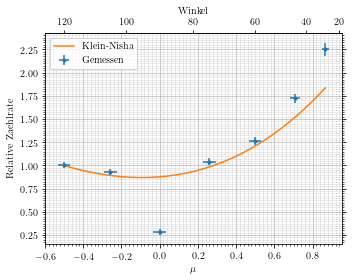

In [50]:
fig, ax = set_up_angle_plot()
ax.set_ylabel('Relative Zaehlrate')
ax.errorbar(mus, rates.T[0]/rates.T[0][-1], xerr=d_mus, yerr=rates.T[1]/rates.T[0][-1], linestyle='None', marker='.', label='Gemessen')
smooth = np.linspace(mus.min(), mus.max())
crossec = klein_nisha(smooth, e_am_2)
ax.plot(smooth, crossec/klein_nisha(mus[-1], e_am_2), label='Klein-Nisha')
ax.legend()
save_fig(fig, 'rel_countrates', 'crossec')


In [349]:
thicks = np.sort(np.array([10, 20, 2, 4, 6]))
exact_thicks = np.sort(np.array([10.2, 20.4, 2.3, 4.4, 6.6]))
thick_0 = angle_specs[1][2]
thick_specs = np.array([load_spectrum(f'../messung/thick/5_{i}mm.SPC.dat', absolute=True) for i in thicks])

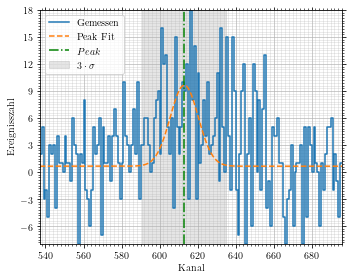

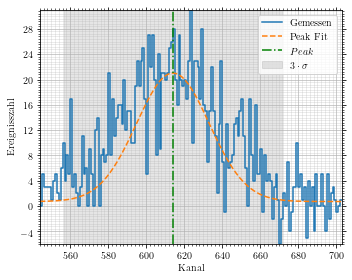

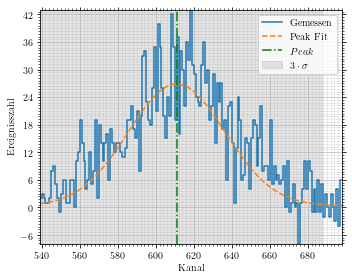

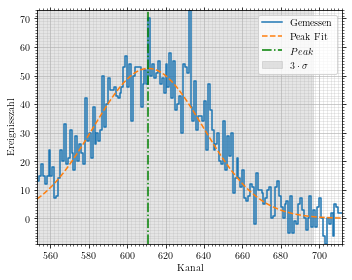

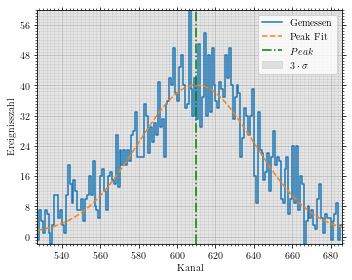

In [350]:
thick_peaks = np.array([np.array(find_peak(thick_specs[i], thick_0, [450, 700], 80, save=(str(thicks[i]), 'dicke'))) for i in range(len(thicks))])

In [351]:
thick_rates = np.array([find_rates(thick_specs[i], thick_0, 7*60, thick_peaks[i][0],
                             thick_peaks[i][2]) for i in range(len(thicks))])

In [352]:
thick_rates

array([[0.63333333, 0.08261596],
       [3.41904762, 0.14467102],
       [5.10952381, 0.16485409],
       [9.87619048, 0.19971635],
       [8.12619048, 0.1897755 ]])

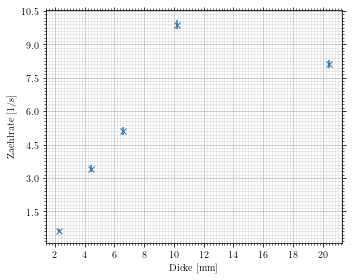

In [353]:
fig, ax = set_up_plot(pimp_top=True)
ax.errorbar(exact_thicks, thick_rates[:,0], yerr=thick_rates[:,1], linestyle='None', marker='x')
ax.set_xlabel('Dicke [mm]')
ax.set_ylabel('Zaehlrate [1/s]')
save_fig(fig, 'countrate', 'dicke')

In [354]:
thick_rates

array([[0.63333333, 0.08261596],
       [3.41904762, 0.14467102],
       [5.10952381, 0.16485409],
       [9.87619048, 0.19971635],
       [8.12619048, 0.1897755 ]])

In [355]:
dists = np.array([7, 9, 12])
dist_specs = np.array([[load_spectrum(f'../messung/dist/7_{i}cm.SPC.dat', absolute=True) for i in dists], [load_spectrum(f'../messung/dist/7_{i}cm_null.SPC.dat', absolute=True) for i in dists]])

(223.0,
 1.1319506856379298,
 9.12605604734396,
 0.5316649863542457,
 39.59975744707183,
 2.969126798748573,
 0.4791679786108479,
 0.2679792705119353)

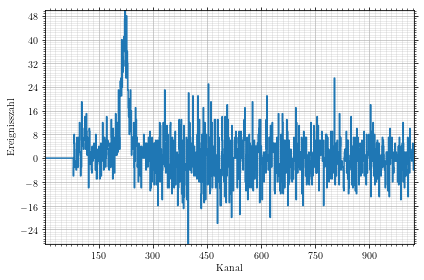

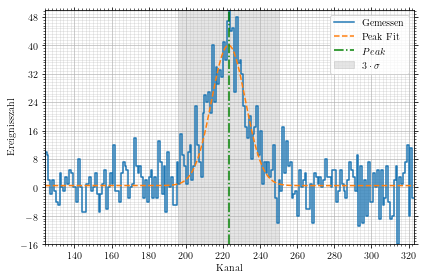

In [356]:
plot_spec(dist_specs[0][0] - dist_specs[1][0])
find_peak(dist_specs[0][0], dist_specs[1][0], [160, 300], 100)

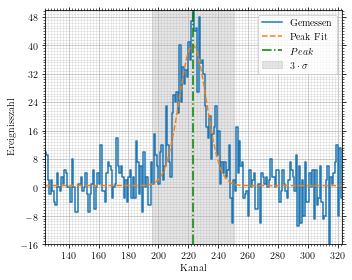

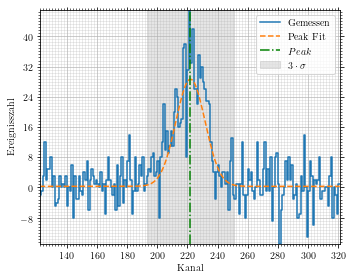

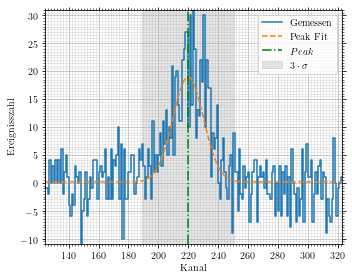

In [357]:
dist_peaks = np.array([np.array(find_peak(dist_specs[0][i], dist_specs[1][i], [160, 300], 100, save=(str(dists[i]), 'dists'))) for i in range(len(dists))])

In [358]:
dist_rates = np.array([find_rates(dist_specs[0][i], dist_specs[1][i], 7*60, dist_peaks[i][0],
                             dist_peaks[i][2]) for i in range(len(dists))])

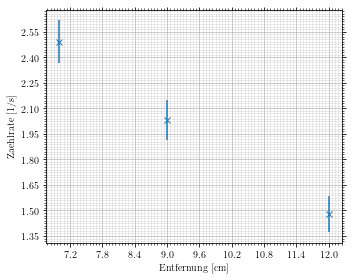

In [359]:
fig, ax = set_up_plot(pimp_top=True)
ax.errorbar(dists, dist_rates[:,0], yerr=dist_rates[:,1], linestyle='None', marker='x')
ax.set_xlabel('Entfernung [cm]')
ax.set_ylabel('Zaehlrate [1/s]')
save_fig(fig, 'countrates', 'dists')

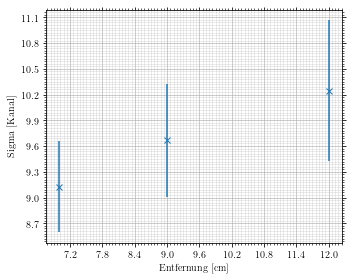

In [360]:
fig, ax = set_up_plot(pimp_top=True)
ax.errorbar(dists, dist_peaks[:, 2], yerr=dist_peaks[:, 3], linestyle='None', marker='x')
ax.set_xlabel('Entfernung [cm]')
ax.set_ylabel('Sigma [Kanal]')
save_fig(fig, 'widths', 'dists')

In [361]:
dist_rates

array([[2.49047619, 0.12540185],
       [2.03095238, 0.11954657],
       [1.47857143, 0.10745985]])